In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [2]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [3]:
# train_X = train_X.astype("float64")
# train_y = train_y.astype("float64")
# test_X = test_X.astype("float64")
# test_y = test_X.astype("float64")

In [4]:
test_X = test_X/255
train_X = train_X/255

In [5]:
train_X.shape, train_y.shape

((60000, 28, 28), (60000,))

In [6]:
train_X.T[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [7]:
def get_one_hot_y(y):
    output = []
    for i in range(y.shape[0]):
        tmp = np.array([0]*10)
        tmp[train_y[i]] = 1
        output.append(tmp)
    return np.array(output).T

def get_flatten_X(X):
    output = []
    for i in range(X.shape[0]):
        output.append(X[i].flatten())
    return np.array(output).T

In [8]:
train_y_onehot = get_one_hot_y(train_y)
train_X_flatten = get_flatten_X(train_X)
test_y_onehot = get_one_hot_y(test_y)
test_X_flatten = get_flatten_X(test_X)

In [9]:
train_y_onehot.shape, test_y_onehot.shape

((10, 60000), (10, 10000))

In [10]:
train_X_flatten.shape, test_X_flatten.shape

((784, 60000), (784, 10000))

Label: 7
Y onehot: [0 0 0 0 0 0 0 1 0 0]


<Figure size 432x288 with 0 Axes>

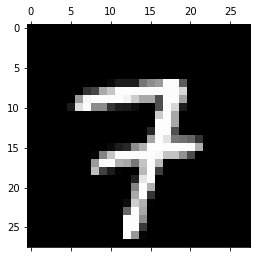

In [11]:
def plot_and_label_train_X(i):
    print("Label:", train_y[i])
    print("Y onehot:", train_y_onehot.T[i])
    plt.gray()
    plt.matshow(train_X[i])
    plt.show()

    # p = np.reshape(train_X_flatten.T[i].T,(28,28))
    # plt.gray()
    # plt.matshow(p)
    # plt.show()



plot_and_label_train_X(np.random.randint(0,1000))

In [12]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x)*(1-sigmoid(x))

def ReLU(Z):
    return np.maximum(Z, 0)

def ReLU_deriv(Z):
    return Z > 0

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A



In [13]:
# suppress warnings
#np.warnings.filterwarnings('ignore')


# init params
W1 = np.random.uniform(-0.5, 0.5, (10,784))
b1 = np.random.uniform(-0.5, 0.5, (10,1))
W2 = np.random.uniform(-0.5, 0.5, (10,10))
b2 = np.random.uniform(-0.5, 0.5, (10,1))

i = 0
m = 2

X = train_X_flatten.T[i:i+m].T # shape -> 784, m
Y = train_y_onehot.T[i:i+m].T

# forward prop
Z1 = W1@X+b1
A1 = ReLU(Z1)
Z2 = W2@A1+b2
A2 = softmax(Z2)

# backward prop
dZ2 = A2-Y
dW2 = 1/m*dZ2@A1.T
db2 = 1/m*np.sum(dZ2)
dZ1 = W2.T@dZ2 * ReLU_deriv(Z1)
dW1 = 1/m*dZ1@X.T
db1 = 1/m*np.sum(dZ1)

# update poram
learning_rate = 0.2
W1 = W1 - learning_rate * dW1
b1 = b1 - learning_rate * db1    
W2 = W2 - learning_rate * dW2  
b2 = b2 - learning_rate * db2    

In [14]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    # print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

In [15]:
print(train_y.shape ,train_y_onehot.shape, train_X_flatten.shape)

(60000,) (10, 60000) (784, 60000)


## TRAINING WITHOUT ITERATIONS

In [16]:
W1 = np.random.uniform(-0.5, 0.5, (10,784))
b1 = np.random.uniform(-0.5, 0.5, (10,1))
W2 = np.random.uniform(-0.5, 0.5, (10,10))
b2 = np.random.uniform(-0.5, 0.5, (10,1))


learning_rate = 0.1
epochs = 500

X = train_X_flatten # shape -> 784, m
Y = train_y_onehot
m = 60000

correct_predictions = 0
wrong_predictions = 0

for epoch in range(epochs):
    # forward prop
    Z1 = W1@X+b1
    A1 = ReLU(Z1)
    Z2 = W2@A1+b2
    A2 = softmax(Z2)

    # backward prop
    dZ2 = A2-Y
    dW2 = 1/m*dZ2@A1.T
    db2 = 1/m*np.sum(dZ2)
    dZ1 = W2.T@dZ2 * ReLU_deriv(Z1)
    dW1 = 1/m*dZ1@X.T
    db1 = 1/m*np.sum(dZ1)

    # update poram
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1    
    W2 = W2 - learning_rate * dW2  
    b2 = b2 - learning_rate * db2    

    # accuracy
    if epoch % 10 == 0 :
        # print(A2)
        print("Epoch: ", epoch)
        predictions = get_predictions(A2)
        print(get_accuracy(predictions, train_y))


Epoch:  0
0.0916
Epoch:  10
0.11695
Epoch:  20
0.17801666666666666
Epoch:  30
0.22885
Epoch:  40
0.2622833333333333
Epoch:  50
0.3123166666666667
Epoch:  60
0.3534833333333333
Epoch:  70
0.38245
Epoch:  80
0.4081666666666667
Epoch:  90
0.4406
Epoch:  100
0.47533333333333333
Epoch:  110
0.50885
Epoch:  120
0.5382
Epoch:  130
0.5628166666666666
Epoch:  140
0.5844166666666667
Epoch:  150
0.6046666666666667
Epoch:  160
0.6228
Epoch:  170
0.6385833333333333
Epoch:  180
0.65485
Epoch:  190
0.6684333333333333
Epoch:  200
0.6809333333333333
Epoch:  210
0.6928833333333333
Epoch:  220
0.7042166666666667
Epoch:  230
0.7135166666666667
Epoch:  240
0.7221
Epoch:  250
0.7298
Epoch:  260
0.7373833333333333
Epoch:  270
0.74415
Epoch:  280
0.751
Epoch:  290
0.75705
Epoch:  300
0.7631833333333333
Epoch:  310
0.7681833333333333
Epoch:  320
0.7732333333333333
Epoch:  330
0.7778
Epoch:  340
0.7823333333333333
Epoch:  350
0.7866
Epoch:  360
0.7900833333333334
Epoch:  370
0.7936833333333333
Epoch:  380
0.796

## IMPLEMENTING BATCH SIZE? BUT I DON'T KNOW HOW WOULD IT HELP? WHY NOT JUST USE ALL THE DATA AT ONCE

Decreasing the batch size during training of a neural network can have several potential benefits:

1- Reducing memory requirements: A smaller batch size means that fewer training examples are processed in each iteration, which can reduce the amount of memory required to store the training data and intermediate results. This can be important for training larger neural networks or when working with limited memory resources.

2- More frequent weight updates: A smaller batch size means that the neural network is updated more frequently during each epoch, which can help to speed up the training process and potentially lead to better convergence. With a larger batch size, the weight updates are less frequent, and the optimizer may take longer to converge to the optimal weights.

3- Improved generalization: Smaller batches can help to prevent the neural network from overfitting to the training data by introducing more randomness and variation into the training process. This can help the network to generalize better to new data and improve its performance on the validation and test sets.

However, decreasing the batch size may also have some potential drawbacks:

1- Slower training convergence: With smaller batch sizes, the optimization process may require more iterations or epochs to converge to the optimal weights, which can result in longer training times.

2- Noisier weight updates: With smaller batch sizes, the gradient estimates may be noisier and less accurate, which can lead to more unstable training and slower convergence. This can be mitigated by using techniques such as momentum or weight decay.

3- Overall, the optimal batch size will depend on the specific neural network architecture, dataset, and optimization algorithm used, and it may require experimentation and tuning to find the best value.






In [17]:

train_X_flatten.T.shape[0]//batch_size

NameError: name 'batch_size' is not defined

## TRAINING WITH ITERATIONS AND MANIPULATIVE BATCH SIZE

In [ ]:
W1 = np.random.uniform(-0.5, 0.5, (10,784))
b1 = np.random.uniform(-0.5, 0.5, (10,1))
W2 = np.random.uniform(-0.5, 0.5, (10,10))
b2 = np.random.uniform(-0.5, 0.5, (10,1))

epochs = 250
batch_size = 60000//1
iterations = train_X_flatten.T.shape[0]//batch_size
learning_rate = 0.65

# m = batch_size
X = train_X_flatten # shape -> 784, m
Y = train_y_onehot # shape -< 10, m

# plot accuracy
accuracy_values = []
epoch_values = []

for epoch in range(epochs+1):

    for iteration in range(iterations):

        X = train_X_flatten.T[(iteration*batch_size):(iteration+1)*batch_size].T
        Y = train_y_onehot.T[(iteration*batch_size):(iteration+1)*batch_size].T
        # print(iter*batch_size)
        # forward prop
        Z1 = W1@X+b1
        A1 = ReLU(Z1)
        Z2 = W2@A1+b2
        A2 = softmax(Z2)

        # backward prop
        dZ2 = A2-Y
        dW2 = 1/m*dZ2@A1.T
        db2 = 1/m*np.sum(dZ2)
        dZ1 = W2.T@dZ2 * ReLU_deriv(Z1)
        dW1 = 1/m*dZ1@X.T
        db1 = 1/m*np.sum(dZ1)

        # update poram
        W1 = W1 - learning_rate * dW1
        b1 = b1 - learning_rate * db1    
        W2 = W2 - learning_rate * dW2  
        b2 = b2 - learning_rate * db2    

        # accuracy
        if epoch % 10 == 0:
            # print(A2)
            print("Epoch:", epoch,)
            predictions = get_predictions(A2)
            accuracy = get_accuracy(predictions, train_y.T[(iteration*batch_size):(iteration+1)*batch_size].T)
            print(accuracy)

            accuracy_values.append(accuracy)
            epoch_values.append(epoch)

fig = plt.figure(1)	#identifies the figure 
plt.title(f"accuracy vs epoch = {epoch}, batch_size = {batch_size}, learning_rate = {learning_rate}, iterations = {iterations}", fontsize='16')	#title
plt.plot(epoch_values, accuracy_values)	#plot the points
plt.xlabel("epoch",fontsize='13')	#adds a label in the x axis
plt.ylabel("accuracy",fontsize='13')	#adds a label in the y axis
# plt.savefig(f"epoch_{epoch} batch_size_{batch_size}.png")	#saves the figure in the present directory

plt.grid()	#shows a grid under the plot
plt.show()







## TEST ACCURACY WITH TEST DATA

In [ ]:

X = test_X_flatten
Y = test_y

Z1 = W1@X+b1
A1 = ReLU(Z1)
Z2 = W2@A1+b2
A2 = softmax(Z2)

get_accuracy(get_predictions(A2), Y)


## TESTING WITH RANDOM INDIVIDUAL DATA


In [ ]:
# index = 5151
index = np.random.randint(0,1000)
#plot_and_label_train_X(index)

X = train_X_flatten.T[index:index+1].T
y = train_y_onehot.T[index:index+1].T


Z1 = W1@X+b1
A1 = ReLU(Z1)
Z2 = W2@A1+b2
A2 = softmax(Z2)

print(f"I am % {np.around(np.max(A2)*100, 2)} certain that it is: ", np.argmax(A2))
plot_and_label_train_X(index)


In [ ]:
W1 = np.random.uniform(-0.5, 0.5, (10,784))
b1 = np.random.uniform(-0.5, 0.5, (10,1))
W2 = np.random.uniform(-0.5, 0.5, (10,10))
b2 = np.random.uniform(-0.5, 0.5, (10,1))

learning_rate = 0.05
iterations = 100



m = 20000
for i in range(0,60000, m):
    X = train_X_flatten.T[i:i+m].T # shape -> 784, m
    Y = train_y_onehot.T[i:i+m].T
    print(i)
    for iter in range(iterations):
        # forward prop
        Z1 = W1@X+b1
        A1 = ReLU(Z1)
        Z2 = W2@A1+b2
        A2 = softmax(Z2)

        # backward prop
        dZ2 = A2-Y            
        dW2 = 1/m*dZ2@A1.T
        db2 = 1/m*np.sum(dZ2)
        dZ1 = W2.T@dZ2 * ReLU_deriv(Z1)
        dW1 = 1/m*dZ1@X.T
        db1 = 1/m*np.sum(dZ1)

        # update poram
        W1 = W1 - learning_rate * dW1
        b1 = b1 - learning_rate * db1    
        W2 = W2 - learning_rate * dW2  
        b2 = b2 - learning_rate * db2    

       # accuracy
        if iter % 10 == 0 :
            # print(A2)
            print("Iteration: ", iter)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, train_y))


In [ ]:
index = np.random.randint(0,1000)
plot_and_label_train_X(index)

X = train_X_flatten.T[index:index+1].T # shape -> 784, m
Y = train_y_onehot.T[index:index+1].T

#print(X.shape)
Z1 = W1@X+b1
A1 = ReLU(Z1)
Z2 = W2@A1+b2
A2 = ReLU(Z2)
print(A2.T[0])
print("guess: ", np.argmax(A2.T[0]), "| certainty: " ,np.max(A2.T[0]) )


In [ ]:
from nnfs.datasets import spiral_data

spiral_data